In [15]:
!git clone git@github.com:jiaqianjing/U-2-Net.git

Cloning into 'U-2-Net'...
remote: Enumerating objects: 822, done.
remote: Counting objects: 100% (196/196), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 822 (delta 114), reused 170 (delta 101), pack-reused 626
Receiving objects: 100% (822/822), 30.72 MiB | 6.18 MiB/s, done.
Resolving deltas: 100% (374/374), done.
Checking connectivity... done.


In [16]:
%cd U-2-Net
!mkdir saved_models
!mkdir saved_models/u2net
!mkdir saved_models/u2netp
#!gdown --id 1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy -O saved_models/u2netp/u2netp.pth
!mc cp --recursive s3/jiaqianjing/ACGPN/u2netp.pth ./saved_models/u2netp/

#!gdown --id 1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ -O saved_models/u2net/u2net.pth
!mc cp --recursive s3/jiaqianjing/ACGPN/u2net.pth ./saved_models/u2net/
%cd ..

/home/jiaqianjing/workspace/search/gans/VITON-HD/U-2-Net
mkdir: cannot create directory ‘saved_models’: File exists
...u2net.pth:  168.12 MiB / 168.12 MiB ┃▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓┃ 98.76 MiB/s 1s/home/jiaqianjing/workspace/search/gans/VITON-HD


In [1]:
# Genearate Cloth Mask
%cd U-2-Net
import u2net_load
import u2net_run

# u2net = u2net_load.model(model_name = 'u2netp')
u2net = u2net_load.model(model_name = 'u2net') # 模型更大，效果更精细
%cd ..

u2net_run.infer(u2net, './datasets/test/cloth/', './datasets/test/cloth-mask')

/home/jiaqianjing/workspace/search/gans/VITON-HD/U-2-Net
...load U2NET---173.6 MB
/home/jiaqianjing/workspace/search/gans/VITON-HD
Generating mask for: 03751_00.jpg
Saving output at ./datasets/test/cloth-mask/03751_00.jpg
Generating mask for: 02783_00.jpg
Saving output at ./datasets/test/cloth-mask/02783_00.jpg
Generating mask for: 925945766.jpg
Saving output at ./datasets/test/cloth-mask/925945766.jpg
Generating mask for: 11791_00.jpg
Saving output at ./datasets/test/cloth-mask/11791_00.jpg
Generating mask for: 11028_00.jpg
Saving output at ./datasets/test/cloth-mask/11028_00.jpg
Generating mask for: 08348_00.jpg
Saving output at ./datasets/test/cloth-mask/08348_00.jpg
Generating mask for: 06802_00.jpg
Saving output at ./datasets/test/cloth-mask/06802_00.jpg
Generating mask for: 09933_00.jpg
Saving output at ./datasets/test/cloth-mask/09933_00.jpg
Generating mask for: 01430_00.jpg
Saving output at ./datasets/test/cloth-mask/01430_00.jpg
Generating mask for: 11351_00.jpg
Saving output 

In [3]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

(430, 430)


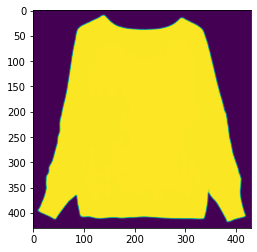

In [15]:
img_path = './datasets/test/cloth-mask/925945766.jpg'
img_01 = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
print(img_01.shape)
plt.imshow(img_01)

(430, 430, 3)
(430, 430)


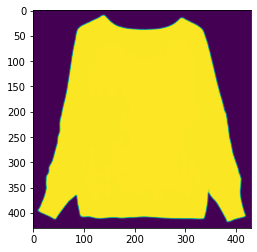

In [16]:
img = cv2.imread('./datasets/test/cloth-mask/925945766.jpg')
print(img.shape)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img_gray.shape)
plt.imshow(img_gray)

In [21]:
(img_01 == img_gray).reshape([-1]).all()

True